<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_1_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np


X, y = make_moons(n_samples=600, noise=0.35, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

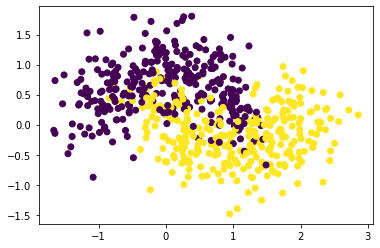

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

# Classification par vote

## Hard voting

In [4]:
from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
dtc_clf = DecisionTreeClassifier()
svm_clf = SVC(kernel="rbf",gamma="scale", random_state=42,probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dtc', dtc_clf), ('svc', svm_clf)],
    voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtc',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, dtc_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8
DecisionTreeClassifier 0.8
SVC 0.8533333333333334
VotingClassifier 0.8466666666666667


## Visualisation

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=1, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#b8a3ff','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha,color="#530689")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha,color="#009838")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

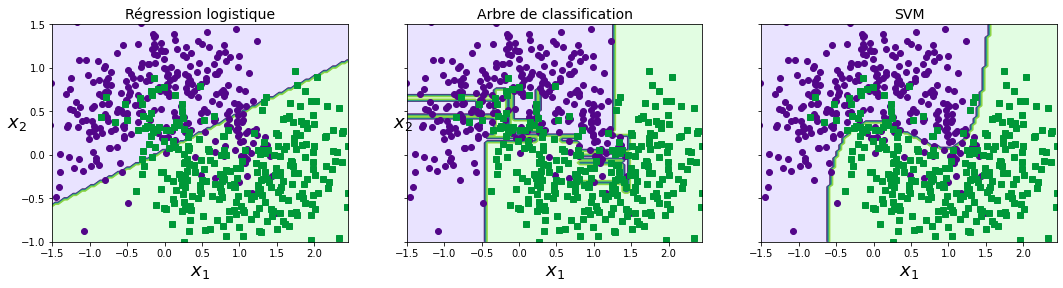

In [8]:
fix, axes = plt.subplots(ncols=3, figsize=(18,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(log_clf, X, y)
plt.title("Régression logistique", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(dtc_clf, X, y)
plt.title("Arbre de classification", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(svm_clf, X, y)
plt.title("SVM", fontsize=14)

plt.ylabel("")

plt.show()

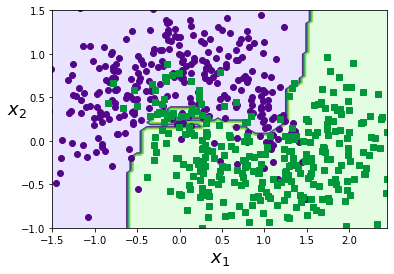

In [9]:
plot_decision_boundary(voting_clf, X, y)

## Soft voting

In [10]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', dtc_clf), ('svc', svm_clf)],
    voting='soft')

soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [11]:

from sklearn.metrics import accuracy_score

for clf in (log_clf, dtc_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8
DecisionTreeClassifier 0.8
SVC 0.8533333333333334
VotingClassifier 0.8733333333333333


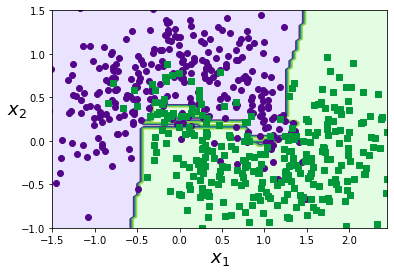

In [12]:
plot_decision_boundary(soft_voting_clf, X, y)

# Régression par vote

**Question** Créer un modèle de régression avec vote, et l'appliquer aux données de ventes immobiliers.

In [13]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

from sklearn.model_selection import train_test_split

X = housing[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]

y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
from sklearn.ensemble import VotingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

reg_clf = LinearRegression()
#reg_clf.fit(X,y)
dtr_clf = DecisionTreeRegressor(max_depth=2)
#dtr_clf.fit(X,y)
svm_clf = SVR()
#svm_clf.fit(X,y)
reg_voting_clf = VotingRegressor(
    estimators=[('lr', reg_clf), ('dtr', dtr_clf), ('svr', svm_clf)])
reg_voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (reg_clf, dtr_clf, svm_clf, reg_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, clf.score(X_test,y_pred))

LinearRegression 1.0
DecisionTreeRegressor 1.0
SVR 1.0
VotingRegressor 1.0
